# **Curso: Programación para el Análisis de Datos**
## **Tarea: Desarrollo de código para el tratamiento y manejo de información**

---

**Presentado por:** Deiver Enrique Alfonso Cortes

**Grupo:** 49

**Código:** 203008069

**Presentado a:** Miguel Ángel Vargas Valencia

**Universidad Nacional Abierta y a Distancia – UNAD**

**Fecha:** 27/10/2024

### **Ejercicio 1: Datos en línea y tipos de datos.**

#### - **Responda las siguientes preguntas en la introducción:**
##### -- ¿Qué es REST web service y cómo se utilizan?
Un servicio web REST es una forma de estructurar servicios que permite la interoperabilidad entre sistemas utilizando HTTP como protocolo base. En lugar de depender de sesiones continuas o estados mantenidos en el servidor, cada interacción es independiente, haciendo que cada solicitud contenga toda la información necesaria para ser procesada. Los recursos que se exponen en un servicio REST se representan con URIs y se manipulan mediante operaciones HTTP estándar.

REST es ideal para aplicaciones escalables y distribuidas, ya que al separar el cliente del servidor, cada parte puede evolucionar sin afectar a la otra. Además, la arquitectura simplifica el desarrollo al ofrecer un enfoque uniforme y eficiente para integrar distintos sistemas. La flexibilidad para elegir los formatos de respuesta (como JSON, XML o HTML) y la posibilidad de cachear las respuestas contribuyen a su rendimiento y eficiencia en diversas aplicaciones, incluidas las móviles y basadas en la web.
##### -- ¿Qué es una RESTful API?
Una RESTful API es una interfaz de programación de aplicaciones (API) que sigue los principios de la arquitectura REST (Representational State Transfer). Esta API permite la comunicación entre sistemas utilizando el protocolo HTTP para acceder, manipular y transferir recursos de manera eficiente.

En una RESTful API, los recursos se identifican mediante URIs (Uniform Resource Identifiers), y cada operación sobre estos recursos se asocia con los métodos estándar de HTTP: GET (para leer), POST (para crear), PUT (para actualizar) y DELETE (para eliminar). La API es stateless (sin estado), lo que significa que cada solicitud contiene toda la información necesaria para procesarla sin depender de peticiones anteriores.
##### -- ¿Qué es JSON?
JSON (JavaScript Object Notation) es un formato ligero y estructurado para intercambiar datos entre sistemas. Está basado en una sintaxis simple que utiliza pares clave-valor, lo que facilita la lectura y escritura tanto para los humanos como para las máquinas. Aunque tiene sus raíces en JavaScript, es un formato independiente del lenguaje y ampliamente compatible con diversas tecnologías. 

#### - **Desarrolle un código de Python que le permita obtener los datos de las naves de SpaceX, desde la API spacexdata v4:**
  [https://api.spacexdata.com/v4/ships](https://api.spacexdata.com/v4/ships)

  Tenga en cuenta que debe usar el paquete `requests`, funciones:
  - `request.get`
  - `Response.json`

  De ser necesario, puede revisar su documentación en:
  [https://requests.readthedocs.io/en/latest/api/?requests.Request](https://requests.readthedocs.io/en/latest/api/?requests.Request)

In [56]:
import requests

def get_spacex_ships_data():
    """
    Helper para realizar una solicitud GET a la API de SpaceX y obtener los datos de las naves.
    Maneja errores HTTP y de conexión.

    @return {list} - Lista de naves si la solicitud es exitosa.
    @raises {Exception} - Si la solicitud falla o no se puede acceder al contenido JSON.
    """
    url = "https://api.spacexdata.com/v4/ships"
    try:
        response = requests.get(url)
        # Verificar errores
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error al realizar la petición: {e}")
        raise


data = get_spacex_ships_data()
print(data)

[{'last_ais_update': None, 'legacy_id': 'AMERICANCHAMPION', 'model': None, 'type': 'Tug', 'roles': ['Support Ship', 'Barge Tug'], 'imo': 7434016, 'mmsi': 367020820, 'abs': 571252, 'class': 7604342, 'mass_kg': 266712, 'mass_lbs': 588000, 'year_built': 1976, 'home_port': 'Port of Los Angeles', 'status': '', 'speed_kn': None, 'course_deg': None, 'latitude': None, 'longitude': None, 'link': 'https://www.marinetraffic.com/en/ais/details/ships/shipid:434663/mmsi:367020820/imo:7434016/vessel:AMERICAN_CHAMPION', 'image': 'https://i.imgur.com/woCxpkj.jpg', 'name': 'American Champion', 'active': False, 'launches': ['5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331'], 'id': '5ea6ed2d080df4000697c901'}, {'last_ais_update': None, 'legacy_id': 'AMERICANISLANDER', 'model': None, 'type': 'Cargo', 'roles': ['Dragon Recovery'], 'imo': None, 'mmsi': 367035570, 'abs': None, 'class': None, 'mass_kg': None, 'mass_lbs': None, 'year_built': None, 'home_port': 'Port of Los Angeles', 'status': '', 'speed_kn

#### - **Cargue el JSON de la respuesta del request anterior como un DataFrame de pandas (ayuda: función `pd.DataFrame.from_dict`).**

In [57]:
import pandas as pd
## verificar que data exista.
if data:
    df = pd.DataFrame.from_dict(data)
else:
    print("No se pudo cargar el DataFrame debido a un error en la petición.")
df.head()

,last_ais_update,legacy_id,model,type,roles,imo,mmsi,abs,class,mass_kg,...,speed_kn,course_deg,latitude,longitude,link,image,name,active,launches,id
0,None,AMERICANCHAMPION,None,Tug,"[Support Ship, Barge Tug]",7434016.0,367020820.0,571252.0,7604342.0,266712.0,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/woCxpkj.jpg,American Champion,False,"[5eb87cdeffd86e000604b330, 5eb87cdfffd86e00060...",5ea6ed2d080df4000697c901
1,None,AMERICANISLANDER,None,Cargo,[Dragon Recovery],NaN,367035570.0,NaN,NaN,NaN,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/jmj8Sh2.jpg,American Islander,False,"[5eb87ce0ffd86e000604b332, 5eb87ce1ffd86e00060...",5ea6ed2d080df4000697c902
2,None,AMERICANSPIRIT,None,Cargo,[Support Ship],NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,None,None,American Spirit,False,[5eb87ce1ffd86e000604b334],5ea6ed2d080df4000697c903
3,None,ASOG,None,Barge,[ASDS barge],NaN,NaN,NaN,NaN,NaN,...,None,None,NaN,NaN,None,None,A Shortfall of Gravitas,True,"[5fe3b11eb3467846b324216c, 5fe3b15eb3467846b32...",5ea6ed2d080df4000697c904
4,None,BETTYRGAMBARELLA,None,Tug,[ASDS Tug],7517478.0,368000890.0,562590.0,7427463.0,202302.0,...,None,None,NaN,NaN,https://www.marinetraffic.com/en/ais/details/s...,https://i.imgur.com/ngYgFnn.jpg,Betty R Gambarella,False,"[5eb87d08ffd86e000604b357, 5eb87d0affd86e00060...",5ea6ed2e080df4000697c905



#### - **Determine cuántas columnas tiene el DataFrame anterior, los tipos de datos (Dtype) que tiene y los datos ausentes (ayuda: imprima el `info()` del DataFrame de pandas).**

In [58]:
if df is not None:
    df.info()
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_ais_update  0 non-null      object 
 1   legacy_id        22 non-null     object 
 2   model            3 non-null      object 
 3   type             29 non-null     object 
 4   roles            29 non-null     object 
 5   imo              21 non-null     float64
 6   mmsi             24 non-null     float64
 7   abs              18 non-null     float64
 8   class            18 non-null     float64
 9   mass_kg          21 non-null     float64
 10  mass_lbs         21 non-null     float64
 11  year_built       26 non-null     float64
 12  home_port        29 non-null     object 
 13  status           17 non-null     object 
 14  speed_kn         0 non-null      object 
 15  course_deg       0 non-null      object 
 16  latitude         2 non-null      float64
 17  longitude        2

#### - **Con la información anterior, en una celda markdown concluya cuáles de las variables podrían ser utilizadas para un análisis y clasifíquelas entre variables cualitativas (categóricas) y cuantitativas (numéricas)**.

**Variables cuantitativas (numéricas):**

- imo
- mmsi
- abs
- class
- mass_kg
- mass_lbs
- year_built
- speed_kn - contiene nulos.
- course_deg - contiene nulos.
- latitude  - contiene nulos.
- logitude - contiene nulos.

**Variables cualitativas (categóricas):**

- legacy_id
- model
- type
- roles
- home_port
- status
- link
- name
- launches
- active
- id
- last_ais_update - contiene nulos

#### - **Determine el total de naves y cuántas están activas**.

In [59]:
if df is not None:
    total_naves = df.shape[0]
    naves_activas = df['active'].sum()
    print(f"Total de naves: {total_naves}")
    print(f"Naves activas: {naves_activas}")
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")

Total de naves: 29
Naves activas: 15


#### - **Visualice el histograma de los pesos de las naves en kg**.

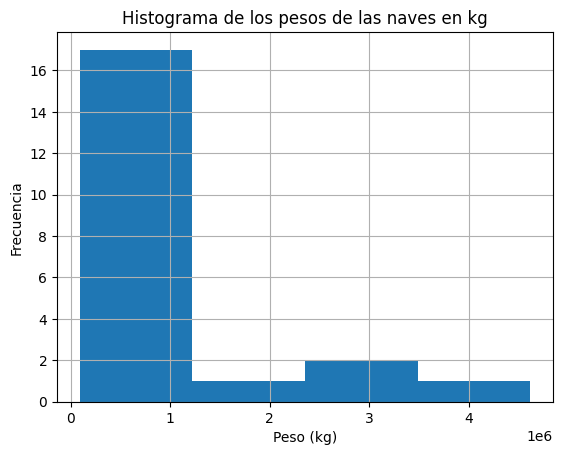

In [60]:
import numpy as np
import matplotlib.pyplot as plt

if df is not None:
    if "mass_kg" in df.columns and df["mass_kg"].notnull().any():
        # Cálculo dinámico del número de bins (Regla de Sturges o Raíz Cuadrada)
        # Número de datos no nulos
        n = df["mass_kg"].notna().sum()
        # Elige el menor entre ambas reglas
        bins = min(1 + int(np.log2(n)), int(np.sqrt(n)))
        df["mass_kg"].dropna().hist(bins=bins)
        plt.xlabel("Peso (kg)")
        plt.ylabel("Frecuencia")
        plt.title("Histograma de los pesos de las naves en kg")
        plt.show()
    else:
        print("No hay datos de 'mass_kg' para visualizar el histograma.")
else:
    print("El DataFrame 'df' no está disponible para realizar el análisis.")